Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 1.6558 - accuracy: 0.4064 - val_loss: 1.4241 - val_accuracy: 0.4928
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3476 - accuracy: 0.5244 - val_loss: 1.3037 - val_accuracy: 0.5434
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.2422 - accuracy: 0.5670 - val_loss: 1.2268 - val_accuracy: 0.5721
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1783 - accuracy: 0.5890 - val_loss: 1.2010 - val_accuracy: 0.5774
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 1.1203 - accuracy: 0.6108 - val_loss: 1.2299 - val_accuracy: 0.5795
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0732 - accuracy: 0.6282 - val_loss: 1.1608 - val_accuracy: 0.5928
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0284 - accuracy: 0.6423 - val_loss: 1.1282 - val_accuracy: 0.6073
Epoch 

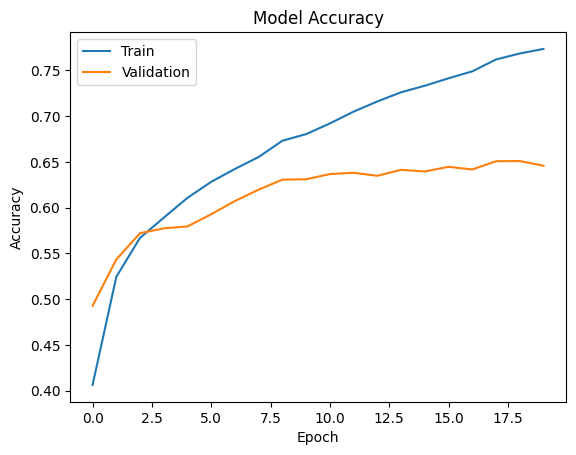

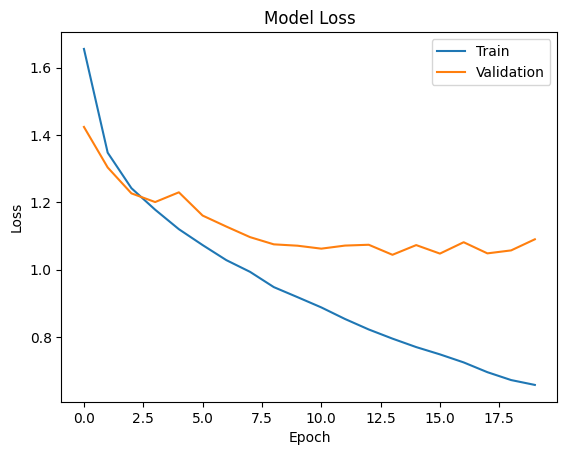

313/313 [==============================] - 1s 3ms/step - loss: 1.0915 - accuracy: 0.6455
Test Loss: 1.0915377140045166
Test Accuracy: 0.6455000042915344


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

class CNNObjectDetection:
    def __init__(self, num_classes=10, filters=32, kernel=(3, 3), dense_nodes=64):
        self.filters = filters
        self.kernel = kernel
        self.dense_nodes = dense_nodes
        self.num_classes = num_classes
        self.model = self.create_model()

    def create_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(self.filters, self.kernel, activation='relu', input_shape=(32, 32, 3)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(self.dense_nodes, activation='relu'),
            tf.keras.layers.Dense(self.num_classes, activation='softmax')
        ])
        return model

    def train_model(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        # Compile the model
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

        return history

    def plot_accuracy(self, history):
        # Plot accuracy graph
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    def plot_loss(self, history):
        # Plot loss graph
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
        plt.show()

    def evaluate_model(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print("Test Loss:", loss)
        print("Test Accuracy:", accuracy)

    def run(self, X_train, y_train, X_val, y_val, X_test, y_test, epochs=10, batch_size=32, plot=False):
        history = self.train_model(X_train, y_train, X_val, y_val, epochs, batch_size)

        if plot: self.plot_accuracy(history)
        if plot: self.plot_loss(history)

        self.evaluate_model(X_test, y_test)

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, random_state=42)

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Create and train the model
cnn = CNNObjectDetection(num_classes=10, filters=32, kernel=(3, 3), dense_nodes=64)
cnn.run(X_train, y_train, 
        X_val, y_val, 
        X_test, y_test, 
        epochs=20, batch_size=128,
        plot=True)


In [2]:
predictions

array([[4.8920693e-04, 2.1202317e-02, 4.3787243e-04, ..., 1.9261253e-04,
        2.3746394e-04, 3.2057220e-03],
       [4.0978016e-03, 1.1373126e-01, 4.5709740e-08, ..., 4.7721165e-09,
        8.7688005e-01, 5.2902927e-03],
       [1.4497687e-01, 3.2172847e-01, 1.1241399e-03, ..., 4.5366542e-04,
        4.9916175e-01, 2.8122816e-02],
       ...,
       [4.1542207e-06, 4.2558060e-08, 2.3583221e-01, ..., 2.0992862e-02,
        4.9228134e-07, 2.3115215e-06],
       [2.9372208e-02, 9.6170825e-01, 3.8320741e-05, ..., 7.6057022e-06,
        8.7212415e-05, 1.5076759e-04],
       [2.5546345e-07, 9.4190558e-09, 1.9968698e-05, ..., 9.9603939e-01,
        6.7683879e-07, 7.1950751e-08]], dtype=float32)